#### **Reinforcement Learning (RL)**


The** Reinforcement Learning** is typically modeled using **Markov Decision Process (MDP)** and defined by a tuple of four entities **(S, A, T, r)**, where S is the state space, A the action place, T the transition function that encodes the transition probabilities, and the r is the immediate reward obtained by taking action at a particular state.

**An Introduction to Reinforcement Learning (RL)**

Reinforcement Learning (RL) is a machine learning paradigm for sequential decision-making. Unlike supervised learning, where predictions are independent, RL agents learn to take a series of actions in an environment to maximize a cumulative reward. The core idea is that past actions influence future states and rewards, requiring the agent to learn a policy that optimizes long-term outcomes, such as delivering a package efficiently despite unforeseen variables.

In Deep Learning, the prediction of a trained model on one test datum does not affect the predictions on a future test datum; in RL decisions are called also called actions that are affected by what decisions are made in the past.

#### **Markov Decision Process (MDP)**

We use a Markov Decision Process (MDP) framework for sequential decision-making. Starting with Value Iteration, which solves MDPs with known dynamics, we then progress to Q-Learning, an off-policy algorithm that enables decision-making in unknown environments. We further explore using deep networks for reinforcement learning, first by imitating an expert and then by developing a method where a deep network directly learns to act in an unknown environment.

**Return and Discount Factor**

The different components together form MDP
An MDP is a tuple (S, A, T, r), where S is the set of states, A is the set of actions, T is the transition function, and r is the reward function. A robot in a state s
t
​
  takes an action a
t
​
 , leading to a new state s
t+1
​
  and a reward r
t
​
 . A sequence of these steps is a trajectory. The goal is to find a trajectory that maximizes the total discounted return, R
t
​
 =∑
k=0
∞
​
 γ
k
 r
t+k+1
​
 . The discount factor, γ∈[0,1), determines the weight of future rewards. A small γ prioritizes immediate rewards, leading to shorter trajectories, while a large γ (close to 1) encourages the agent to explore for long-term optimal rewards.

**Markov Assumption**

Markov systems are systems where the next state is solely determined by the current state and action, independent of any previous states or actions. While this may seem like a restrictive assumption, Markov Decision Processes (MDPs) can effectively model a wide range of real-world systems.

**Value Function**

$$
V^{\pi}(s) = \mathbb{E}_{\pi} \left[ \sum_{k=0}^{\infty} \gamma^k R_{t+k+1} \mid S_t = s \right]
$$

**Action Value Function**

The action-value function, often denoted as Q
pi
 (s,a), represents the expected return when starting in state s, taking action a, and then following policy
pi thereafter.

$$
Q^{\pi}(s,a) = \mathbb{E}_{\pi} \left[ \sum_{k=0}^{\infty} \gamma^k R_{t+k+1} \mid S_t = s, A_t = a \right]
$$

This can also be expressed recursively using the Bellman equation, which is particularly useful for computation:

$$
Q^{\pi}(s,a) = \sum_{s', r} p(s', r \mid s, a) \left[ r + \gamma \sum_{a'} \pi(a' \mid s') Q^{\pi}(s', a') \right]
$$




- Here:

s
′
  and r are the next state and reward.

p(s
′
 ,r
mids,a) is the probability of transitioning to state s
′
  with reward r given the current state s and action a.

pi(a
′

mids
′
 ) is the probability of taking action a
′
  in state s
′
  according to policy
pi.

**Optimal Stochastic Policy**

An optimal policy, denoted as
pi
∗
 , is a policy that maximizes the expected return. In a stochastic setting, this means that for each state, the policy defines a probability distribution over the actions. An optimal stochastic policy is one that achieves the optimal action-value function, Q
∗
 (s,a).

The optimal policy is given by:
$$
Q^{\pi}(s,a) = \sum_{s', r} p(s', r \mid s, a) \left[ r + \gamma \sum_{a'} \pi(a' \mid s') Q^{\pi}(s', a') \right]
$$

#### **Value Iteration**

$$
V_{k+1}(s) = \max_{a \in A} \sum_{s', r} p(s', r \mid s, a) [r + \gamma V_k(s')]
$$

#### **Policy Evaluation**

$$
V_{k+1}^{\pi}(s) = \sum_{a} \pi(a \mid s) \sum_{s', r} p(s', r \mid s, a) [r + \gamma V_k^{\pi}(s')]
$$

**Value Iteration in the FrozenLake Problem**

The robot navigates a 4x4 grid with states and actions ('up', 'down', 'left', 'right'). The grid contains frozen cells (F), holes (H), and a goal (G). The environment is deterministic, meaning actions are always successful. The robot receives a reward of +1 for reaching the goal and 0 otherwise. Its objective is to learn a policy to navigate from the start (S) to the goal (G) to maximize its total return.

In [ ]:
import dl_modules

In [ ]:
def frozen_lake(seed):
    """Defined in :numref:`sec_utils`"""
    # See https://www.gymlibrary.dev/environments/toy_text/frozen_lake/ to learn more about this env
    # How to process env.P.items is adpated from https://sites.google.com/view/deep-rl-bootcamp/labs

    env = gym.make('FrozenLake-v1', is_slippery=False)
    ##env.seed(seed)
    env.action_space.np_random.seed(seed)
    env.action_space.seed(seed)
    env_info = {}
    env_info['desc'] = env.desc  # 2D array specifying what each grid item means
    env_info['num_states'] = 16 #env.nS  # Number of observations/states or obs/state dim
    env_info['num_actions'] = 4 #env.nA  # Number of actions or action dim
    # Define indices for (transition probability, nextstate, reward, done) tuple
    env_info['trans_prob_idx'] = 0  # Index of transition probability entry
    env_info['nextstate_idx'] = 1  # Index of next state entry
    env_info['reward_idx'] = 2  # Index of reward entry
    env_info['done_idx'] = 3  # Index of done entry
    env_info['mdp'] = {}
    env_info['env'] = env

    for (s, others) in env.P.items():
        # others(s) = {a0: [ (p(s'|s,a0), s', reward, done),...], a1:[...], ...}

        for (a, pxrds) in others.items():
            # pxrds is [(p1,next1,r1,d1),(p2,next2,r2,d2),..].
            # e.g. [(0.3, 0, 0, False), (0.3, 0, 0, False), (0.3, 4, 1, False)]
            env_info['mdp'][(s,a)] = pxrds

    return env_info

In [ ]:
seed = 0
gamma = 0.95
num_iters = 10
random.seed(seed)

In [ ]:
env_info = frozen_lake(seed)

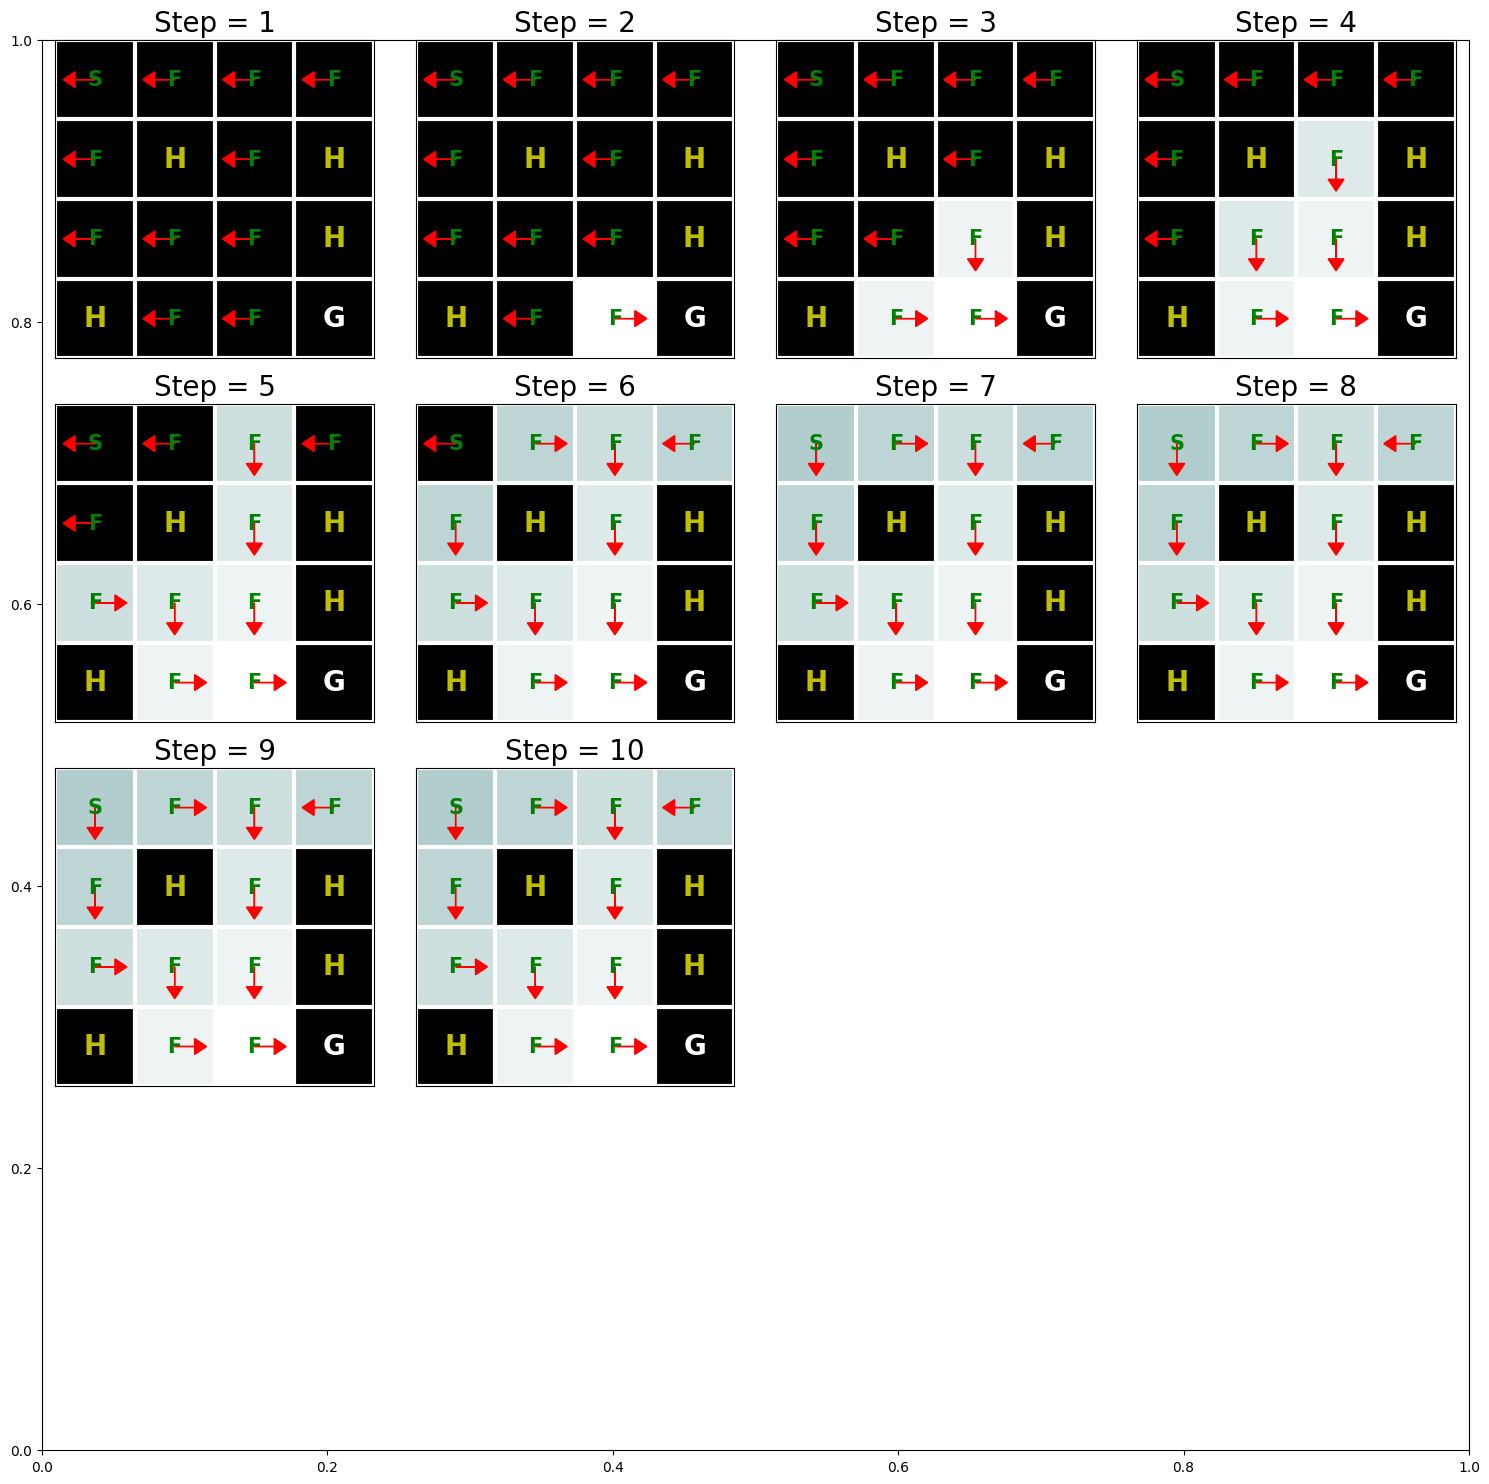

In [ ]:
def value_iteration(env_info, gamma, num_iters):
  env_desc = env_info['desc']
  num_states = env_info['num_states']
  num_actions = env_info['num_actions']

  trans_prob_idx = env_info['trans_prob_idx']
  nextstate_idx = env_info['nextstate_idx']
  reward_idx = env_info['reward_idx']
  done_idx = env_info['done_idx']
  mdp = env_info['mdp']

  V = np.zeros((num_iters +1, num_states))
  pi = np.zeros((num_iters +1, num_states))
  Q = np.zeros((num_iters +1, num_states, num_actions))

  for k in range(1, num_iters +1):
    for s in range(num_states):
      for a in range(num_actions):
        for pxrds in mdp[(s,a)]:
          pr = pxrds[trans_prob_idx]
          next_state = pxrds[nextstate_idx]
          reward = pxrds[reward_idx]
          #d = pxrds[done_idx]
          Q[k, s, a] += pr * (reward + gamma*V[k -1, next_state])
      V[k, s] = np.max(Q[k, s])
      pi[k, s] = np.argmax(Q[k, s])
  show_value_function_progress(env_desc, V[:-1], pi[:-1])

value_iteration(env_info=env_info, gamma=gamma, num_iters=num_iters)

#### **The Q-Learning**

The Q-Learning algorithm uses a simple but powerful update rule, which is a form of temporal-difference (TD) learning. It iteratively updates the action-value function, Q(s,a), based on a reward received and the estimated optimal future value.

$$
Q(s,a) \leftarrow Q(s,a) + \alpha \left[ r + \gamma \max_{a'} Q(s',a') - Q(s,a) \right]
$$



Explanation of the components:
- **Q(s,a)**: The current Q-value for the state-action pair (s,a).
**--  leftarrow**: The assignment operator, indicating that the value on the left is being updated.
**-- alpha**: The learning rate, a value between 0 and 1. It determines how much of the new information overrides the old information.
**-- r**: The immediate reward received after taking action a in state s.
**-- gamma**: The discount factor, which weights the importance of future rewards.
**-- s**
′
 : The new state (or next state) that the agent transitions to after taking action a.
**-- max_a **
′
 Q(s
′
 ,a
′
 ): The key part of the update. This is the estimated optimal future value, which is the maximum Q-value achievable from the new state s
′
 . This "max" makes Q-Learning an off-policy algorithm, as it uses the optimal future action's value for its update, regardless of the policy being followed to choose the current action.
 **-- left**[r+
gamma
max_a
′
 Q(s
′
 ,a
′
 )−Q(s,a)
**-- right]**: The temporal-difference (TD) error. This is the difference between the new, more informed estimate of the Q-value and the current estimate. The algorithm seeks to reduce this error.

**Q-Learning Algorithm Pseudo-Code (Compact)**


In [ ]:
seed = 0
gamma = 0.95
num_iters = 256
alpha = 0.9
epsilon = 0.9
random.seed(seed)

In [ ]:
env_info = frozen_lake(seed)

In [ ]:
seed = 0
gamma = 0.95
num_iters = 256
alpha = 0.9
epsilon = 0.9
np.random.seed(seed)

In [ ]:
def e_greedy(env, Q, s, epsilon):
  if np.random.random() < epsilon:
    return env.action_space.sample()
  else:
    return np.argmax(Q[s])

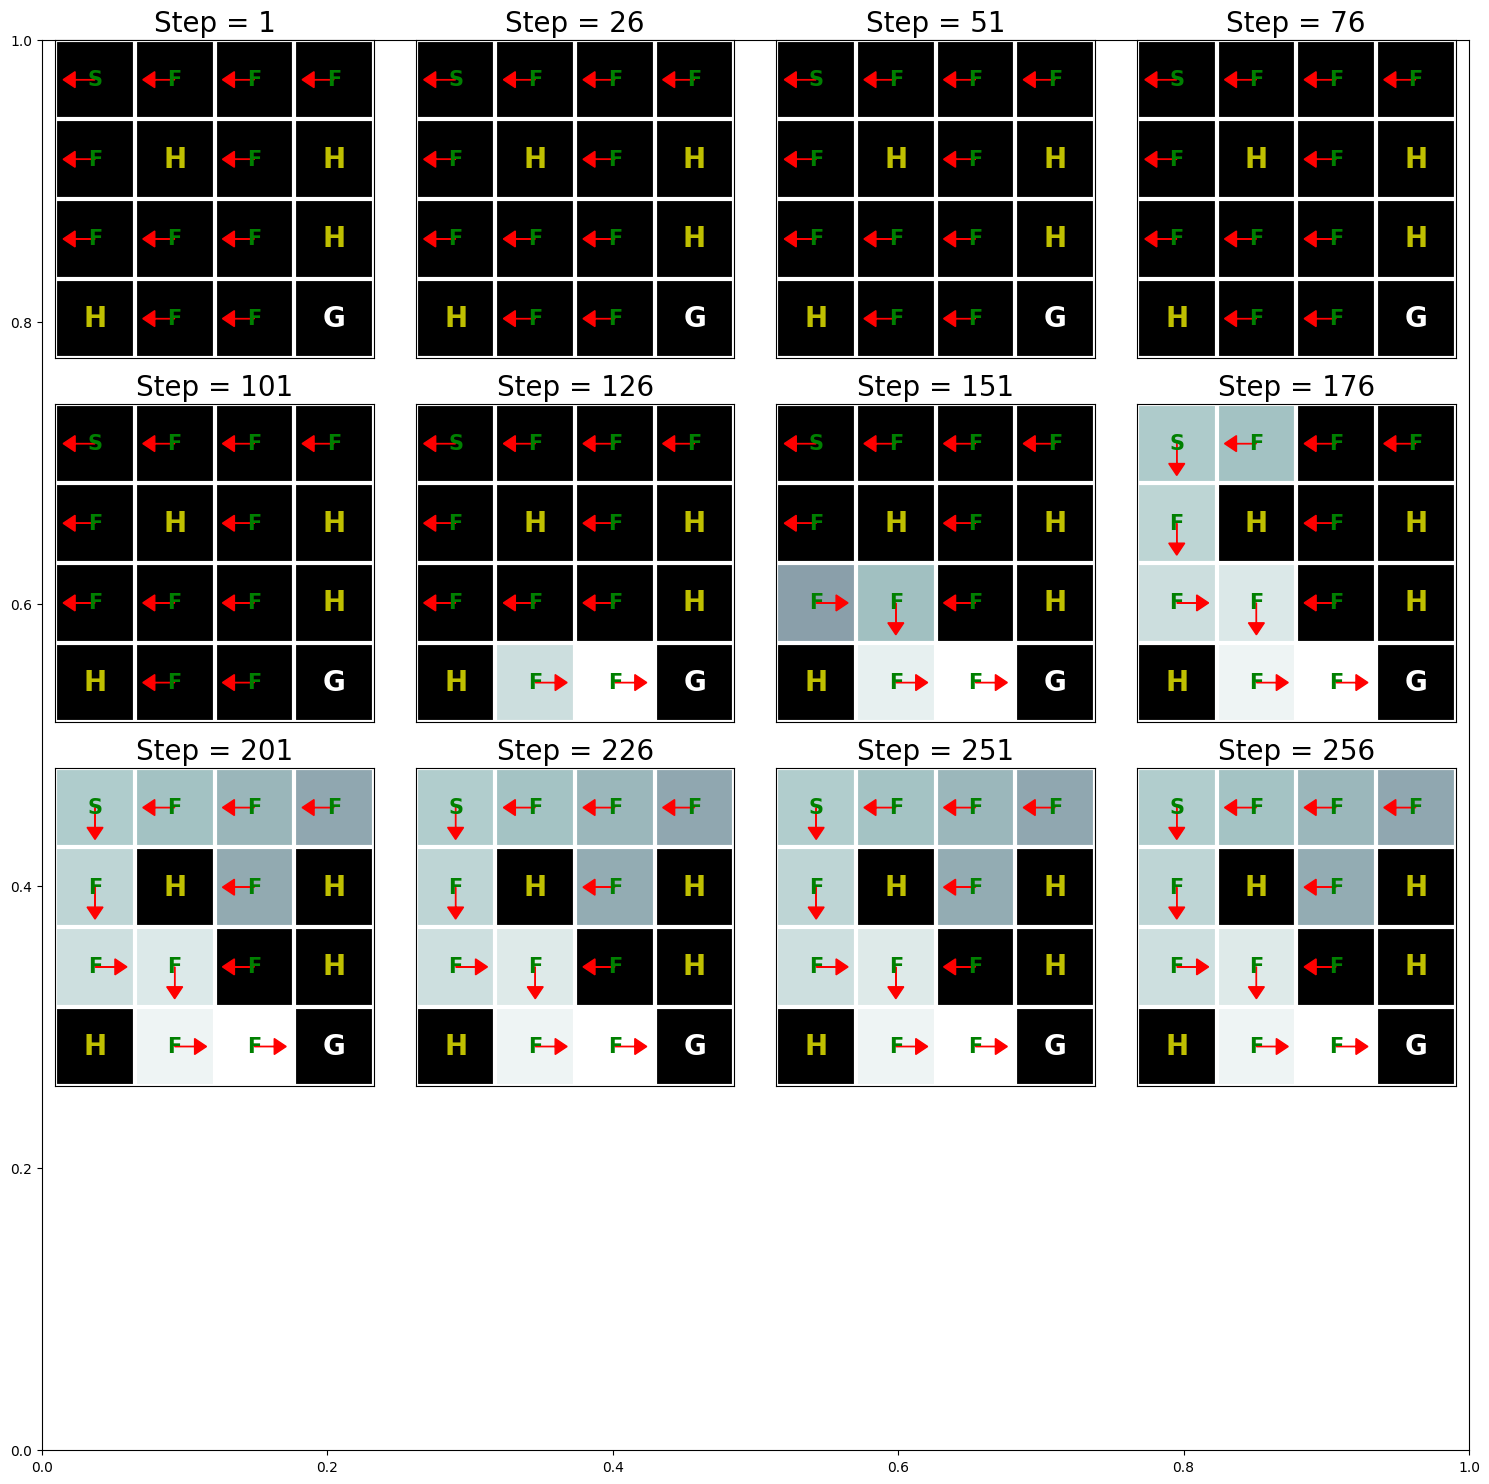

In [ ]:
''' Implement Q-learning '''
def q_learning(env_info, gamma, num_iters, alpha, epsilon):
  num_states = env.observation_space.n
  num_actions = env.action_space.n
  env_desc = env_info['desc']

  Q = np.zeros((num_states, num_actions))
  V = np.zeros((num_iters +1, num_states))
  pi = np.zeros((num_iters +1, num_states))

  for k in range(1, num_iters +1):
    # Reset environment
    state = env.reset()
    done = False
    while not done:
      # Select an action for a given state acts in env. based
      action = e_greedy(env, Q, state, epsilon)
      next_state, reward, done, _ = env.step(action)
      # Q-update
      y = reward + gamma * np.max(Q[next_state, :])
      Q[state, action] += alpha * (y - Q[state, action])
      # Move to the next state
      state = next_state
    # Record max-value and max action for visualization purposes
    for state in range(num_states):
        V[k] = np.max(Q, axis=1)
        pi[k] = np.argmax(Q, axis=1)
  show_Q_function_progress(env_desc, V[:-1], pi[:-1])

q_learning(env_info=env_info, gamma=gamma, num_iters=num_iters,
      alpha=alpha, epsilon=epsilon)